<span style="font-size: 5em">🦜</span>

# __LangGraph Essentials__ 
> **Disclaimer**  
> This notebook uses content adapted from a course-provided notebook available at [github.com/langchain-ai/lca-langgraph-essentials](https://github.com/langchain-ai/lca-langgraph-essentials).  
> All original credit belongs to the course authors.

## Lab 1: States & Nodes

LangGraph organizes workflows as graphs where nodes are functions and edges define execution flow. All nodes share a common state that gets passed between them. This notebook shows how to define state, create nodes, and connect them into an executable graph.


In [3]:
from IPython.display import Image, display
import operator
from typing import Annotated, List, Literal, TypedDict
from langgraph.graph import END, START, StateGraph
from langgraph.types import Command, interrupt

In [20]:
class State(TypedDict):
    nlist: List[str]
    aux: int

In [21]:
def node_a(state: State) -> State:
    print(f"node a is receiving {state['nlist']}")
    note = "Hello World from Node a"
    return(State(nlist = [note], aux = state['aux'] + 1))

def node_b(state: State) -> State:
    print(f"node b is receiving {state['nlist']}")
    note = "Hello World from Node b"
    return(State(nlist = [note], aux = state['aux'] + 1))

In [22]:
builder = StateGraph(State)
builder.add_node("a", node_a)
builder.add_node("b", node_b)
builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("b", END)
graph = builder.compile()

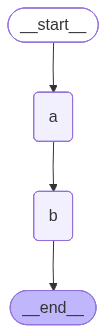

In [23]:
display(Image(graph.get_graph().draw_mermaid_png()))
# print(graph.get_graph().draw_mermaid())

In [24]:
initial_state = State(
    nlist = ["Hello Node a, how are you?"],
    aux = 0
)
graph.invoke(initial_state)

node a is receiving ['Hello Node a, how are you?']
node b is receiving ['Hello World from Node a']


{'nlist': ['Hello World from Node b'], 'aux': 2}

⚠️ See how nlist is overwritten

## Takeaways

Setup:

- State: All nodes share the same [state](#state_definition) which can be a Python TypedDict, dataclass, or a Pydantic BaseModel
- Nodes: Defined as simple [Python functions](#node_function) that receive state as input and return updated state

Execution (invoke):

- Runtime: When you call [invoke](#graph_invoke), the graph initializes the input state from your invoke statement and determines which nodes to run
- State Flow: Each node receives the current state as input, executes its logic, and returns an updated state
- Graph Return: After all nodes complete execution, the graph returns the final state value

Try Next:

- Add another node to the [graph](#graph_building) and connect it with edges
- Modify the print statement in the [node function](#node_function) or change the initial state message
- Extend the [State TypedDict](#state_definition) with additional fields to pass more data between nodes